# 상권 기본 정보 분석

### 구/동/상권별 점포 수 csv 파일 저장

In [ ]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os
from pathlib import Path

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME")
)

# 구별 점포 수 CSV
query_shop_count_by_gu = """SELECT ca.gu AS 구,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, sca.name
ORDER BY ca.gu, 점포수 DESC;"""
df_shop_count_by_gu = pd.read_sql(query_shop_count_by_gu, conn)
df_shop_count_by_gu.to_csv('./src/eda/shop_count_by_gu.csv', index=False, encoding='utf-8-sig')

# 동별 점포 수 CSV
query_shop_count_by_dong = """SELECT ca.gu AS 구,
       ca.dong AS 동,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, ca.dong, sca.name
ORDER BY ca.gu, ca.dong, 점포수 DESC;"""
df_shop_count_by_dong = pd.read_sql(query_shop_count_by_dong, conn)
df_shop_count_by_dong.to_csv('./src/eda/shop_count_by_dong.csv', index=False, encoding='utf-8-sig')

# 상권별 점포 수 CSV
query_shop_count_by_area = """SELECT ca.gu AS 구,
       ca.name AS 상권명,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, ca.name, sca.name
ORDER BY ca.gu, 점포수 DESC;"""
df_shop_count_by_area = pd.read_sql(query_shop_count_by_area, conn)
df_shop_count_by_area.to_csv('./src/eda/shop_count_by_area.csv', index=False, encoding='utf-8-sig')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\1149290502.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shop_count_by_gu = pd.read_sql(query_shop_count_by_gu, conn)


### 구/동/상권별 CSV 파일 불러오기

In [36]:
import pandas as pd

# 구/동/상권별 CSV
df_shop_count_by_gu = pd.read_csv('./src/eda/shop_count_by_gu.csv', encoding='utf-8-sig')
df_shop_count_by_dong = pd.read_csv('./src/eda/shop_count_by_dong.csv', encoding='utf-8-sig')
df_shop_count_by_area = pd.read_csv('./src/eda/shop_count_by_area.csv', encoding='utf-8-sig')

In [30]:
# 한 셀에서 여러 개 확인 display
display(df_shop_count_by_gu.head())
display(df_shop_count_by_dong.head())
display(df_shop_count_by_area.head())

구      업종명      점포수
0  강남구    한식음식점  15458.0
1  강남구    커피-음료   7013.0
2  강남구    양식음식점   4656.0
3  강남구  호프-간이주점   4161.0
4  강남구    일식음식점   3292.0

구     동      업종명    점포수
0  강남구  개포2동    한식음식점  179.0
1  강남구  개포2동    커피-음료   37.0
2  강남구  개포2동    분식전문점   36.0
3  강남구  개포2동  호프-간이주점   32.0
4  강남구  개포2동    일식음식점   23.0

구     상권명    업종명     점포수
0  강남구     역삼역  한식음식점  1397.0
1  강남구     선릉역  한식음식점  1011.0
2  강남구    신논현역  한식음식점   944.0
3  강남구  포스코사거리  한식음식점   702.0
4  강남구   뱅뱅사거리  한식음식점   636.0

### 구별 업종 점포수 시각화

- 구별 총 점포 수

    일단 먼저 보여주고 그 다음으로 넘어감<br>숫자가 겹치는 현상 때문에 막대 안에 넣고 90도 돌리고 흰색으로 변경

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) Arial.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\2382223764.py:23: UserWarning:

Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missi

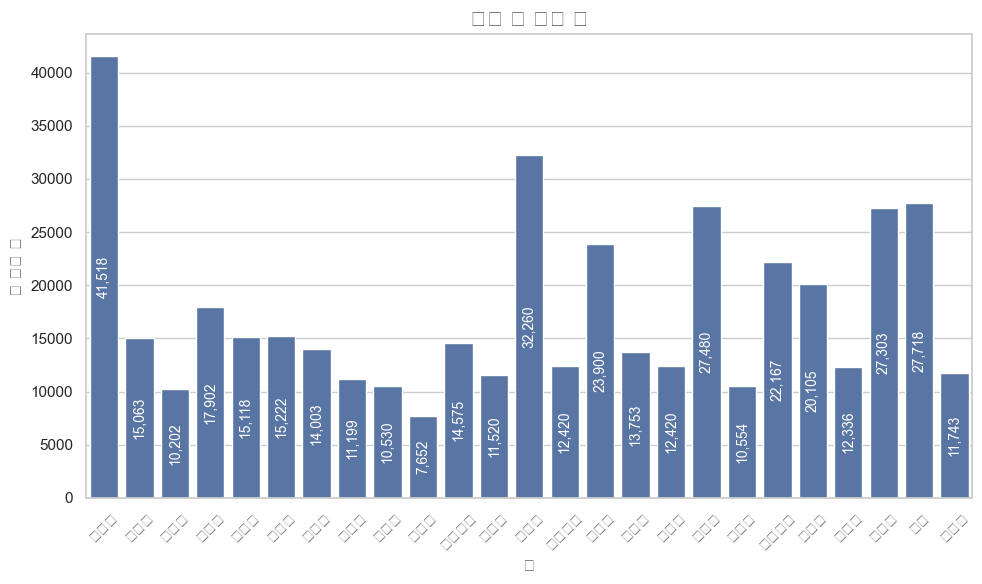

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 스타일 설정
matplotlib.rc('font', family='NanumGothic')
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# 구별 점포 수 합계 계산
df_gu_total = df_shop_count_by_gu.groupby('구')['점포수'].sum().reset_index()
df_gu_total['점포수'] = df_gu_total['점포수'].astype(int)       # 정수로 바꿔주기

# 막대 그래프 그리기
sns.barplot(data=df_gu_total, x='구', y='점포수', color='#4C72B0')

# 그래프 꾸미기
plt.title('구별 총 점포 수', fontsize=16)
plt.xlabel('구', fontsize=12)
plt.ylabel('총 점포 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 값 표시
for index, row in df_gu_total.iterrows():
    plt.text(index, row['점포수']/2, f"{row['점포수']:,}", 
             ha='center', va='center', fontsize=10, color='white', rotation=90)


plt.show()


#### 구별 외식업 업종별 점포 수 
점포 수가 가장 많은 강남구와 가장 적은 도봉구를 캡쳐

In [77]:
import plotly.express as px

fig_shop_count_by_gu = px.bar(df_shop_count_by_gu,
                x='구',
                y='점포수',
                color='업종명',
                text='점포수',
                title='구별 외식업 업종 점포 수',
                barmode='group')
fig_shop_count_by_gu.update_layout(xaxis_title='구', yaxis_title='점포 수', legend_title='업종')
fig_shop_count_by_gu.show()

#### 동별 외식업 업종별 점포 수 
강남구 내에서는 역삼1동이 점포가 가장 많이 분포하고 있어 강남구의 상권 중심지로 볼 수 있다.<br>
금천구는 가산동이 제일 점포가 많고 커피-음료 업종이 2번 째로 많은 것을 알 수 있다.


In [85]:
fig_shop_count_by_dong = px.treemap(df_shop_count_by_dong,
                      path=['구', '동', '업종명'],
                      values='점포수',
                      color='점포수',
                      color_continuous_scale='Blues',
                      title='동별 외식업 점포 수',
                      hover_data={'점포수': False})  # 원래 점포수 숨김
fig_shop_count_by_dong.show()

### 상권별 업종 점포수 시각화

#### 전체 상권별 점포수

In [87]:
fig_shop_count_by_area = px.bar(df_shop_count_by_area,
                  x='상권명',
                  y='점포수',
                  color='업종명',
                  title='상권별 외식업 점포 수',
                  text='점포수')
fig_shop_count_by_area.update_layout(xaxis_title='상권', yaxis_title='점포 수', legend_title='업종', height=600)
fig_shop_count_by_area.show()

#### 점포수 상위 20개 상권
이태원은 양식음식점이 더 많음


In [89]:
import pandas as pd 
import plotly.express as px

# 상위 20개 상권 추출 (총 점포수 기준)
top_shop_count_n = df_shop_count_by_area.groupby('상권명')['점포수'].sum().sort_values(ascending=False).head(20)
top_order = top_shop_count_n.index  # 순서 정보 저장

# 상위 20개 상권 필터링 후 색상별 합계를 피벗
df_top = df_shop_count_by_area[df_shop_count_by_area['상권명'].isin(top_order)].copy()
df_pivot = df_top.pivot_table(index='상권명', columns='업종명', values='점포수', aggfunc='sum').fillna(0)

# x축 순서 강제
df_pivot = df_pivot.loc[top_order]

# 다시 long format으로 변환
df_long = df_pivot.reset_index().melt(id_vars='상권명', var_name='업종명', value_name='점포수')

# 시각화
fig = px.bar(df_long,
             x='상권명',
             y='점포수',
             color='업종명',
             title='점포 수 상위 20개 상권 (업종별)',
             text='점포수')

fig.update_layout(xaxis_title='상권', yaxis_title='점포 수', legend_title='업종', height=600)
fig.show()

## 상권별 점포 수 + 면적 조회 CSV 파일 저장

In [200]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME")
)

query_density_by_gu = """SELECT ca.gu AS 구,
       SUM(s.shop_count) AS 점포수,
       SUM(ca.area_size) AS 총면적,
       SUM(s.shop_count)/SUM(ca.area_size) AS 구별_점포밀도
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu
ORDER BY 구별_점포밀도 DESC;
"""
df_density_by_gu = pd.read_sql(query_density_by_gu, conn)
df_density_by_gu.to_csv('./src/eda/commercial_area_density_by_gu.csv', index=False, encoding='utf-8-sig')



query_density_by_dong = """SELECT ca.gu AS 구,
       ca.dong AS 동,
       SUM(s.shop_count) AS 점포수,
       SUM(ca.area_size) AS 총면적,
       SUM(s.shop_count)/SUM(ca.area_size) AS 동별_점포밀도
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, ca.dong
ORDER BY 동별_점포밀도 DESC;
"""
df_density_by_dong = pd.read_sql(query_density_by_dong, conn)
df_density_by_dong.to_csv('./src/eda/commercial_area_density_by_dong.csv', index=False, encoding='utf-8-sig')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\3105878070.py:28: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\3105878070.py:47: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



#### 밀도(면적, 점포수 활용) 비교 csv 파일 불러오기

In [201]:
import pandas as pd

df_density_by_gu = pd.read_csv('./src/eda/commercial_area_density_by_gu.csv', encoding='utf-8-sig')
df_density_by_dong = pd.read_csv('./src/eda/commercial_area_density_by_dong.csv', encoding='utf-8-sig')

## Choropleth 맵 시각화

#### 구별 외식업 점포 밀집도 시각화
html로 저장, 구 이름 표시, 글자 위치 수정

In [203]:
import pandas as pd
import geopandas as gpd
import folium


# 2. 컬럼 이름 맞추기 (SQL 컬럼명을 점포밀도로 rename)
df_density_by_gu.rename(columns={'구별_점포밀도':'점포밀도'}, inplace=True)

# 3. 서울 구 경계 GeoJSON 불러오기
geo_path = './src/eda/서울_자치구_경계_2017.geojson'
geo_seoul = gpd.read_file(geo_path)

# 4. 데이터 합치기
geo_seoul = geo_seoul.merge(df_density_by_gu, left_on='SIG_KOR_NM', right_on='구')

# 5. Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 6. Choropleth 추가
folium.Choropleth(
    geo_data=geo_seoul,
    name='choropleth',
    data=geo_seoul,
    columns=['SIG_KOR_NM', '점포밀도'],
    key_on='feature.properties.SIG_KOR_NM',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='상권 점포 밀도'
).add_to(m)

# 7. 구 이름 항상 표시 (Centroid 기준)
for _, row in geo_seoul.iterrows():
    centroid = row['geometry'].centroid
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(
            html=f"""
            <div style="
                font-size:10pt;
                font-weight:bold;
                color:darkblue;
                text-align:center;
                padding: 2px 4px;
                border-radius: 3px;
                white-space: nowrap;
                margin-left: -15px;
            ">{row['SIG_KOR_NM']}</div>
            """
        )
    ).add_to(m)

# 8. LayerControl 추가
folium.LayerControl().add_to(m)

# 9. HTML로 저장
m.save('./src/eda/commercial_area_density_by_gu_map.html')


#### 동별 외식업 점포 밀집도 시각화

In [207]:
import pandas as pd
import plotly.express as px
import json

# 1. CSV 불러오기 (SQL에서 계산한 동별 점포밀도)
df_density_by_dong = pd.read_csv(
    './src/eda/commercial_area_density_by_dong.csv', 
    encoding='utf-8-sig'
)

# SQL 컬럼명 '동별_점포밀도' → Plotly용 '점포밀도'로 rename
df_density_by_dong.rename(columns={'동별_점포밀도':'점포밀도'}, inplace=True)

# 2. GeoJSON 불러오기
with open('./src/eda/hangjeongdong_서울특별시.geojson', 'r', encoding='utf-8') as f:
    geo_dong = json.load(f)

# GeoJSON에서 동 이름만 추출 (adm_nm -> 동 이름)
for feature in geo_dong['features']:
    # 예: "서울특별시 종로구 사직동" -> "사직동"
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

# 3. 동 단위 Choropleth 그리기
fig = px.choropleth(
    df_density_by_dong,
    geojson=geo_dong,
    featureidkey='properties.dong_name',
    locations='동',
    color='점포밀도',
    color_continuous_scale='Reds',
    range_color=(0, df_density_by_dong['점포밀도'].max()),
    hover_data=['구', '점포밀도'],  # '상권명' 제거
    title='서울 동별 상권 점포 밀도'
)

# 지도 범위 자동 맞춤, 배경 제거
fig.update_geos(fitbounds="locations", visible=False)

# 출력
fig.show()


In [213]:
import plotly.express as px

# 상위 15개 동 추출
top15_dong = df_density_by_dong.sort_values(by='점포밀도', ascending=False).head(15)

# 마이크로 단위 변환 (1e6 곱)
top15_dong['점포밀도_마이크로'] = top15_dong['점포밀도'] * 1e6

# Bar Chart
fig_bar = px.bar(
    top15_dong,
    x='동',
    y='점포밀도_마이크로',
    color='점포밀도_마이크로',
    text='점포밀도_마이크로',
    hover_data=['구'],
    title='서울 동별 상권 점포 밀도 상위 15개',
    color_continuous_scale='Reds'
)

# 글자 소수점 없이 표시
fig_bar.update_traces(texttemplate='%{text:.0f}', textposition='outside')

# 레이아웃 조정
fig_bar.update_layout(xaxis_title='동', yaxis_title='점포 밀도 (μ)', yaxis=dict(range=[0, top15_dong['점포밀도_마이크로'].max()*1.1]))

fig_bar.show()


## 매출 기본 정보 분석

#### 2024년도 기준 총 매출 분석 - 구,동,상권
구/동/상권별 총 매출 분석 csv 저장

In [216]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME"),
)

# 쿼리 실행
query_sales_gu = """
SELECT ca.gu, SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu
ORDER BY total_sales DESC;

"""

df_sales_gu = pd.read_sql(query_sales_gu, conn)

# CSV로 저장
df_sales_gu.to_csv('./src/eda/total_sales_gu.csv', index=False, encoding='utf-8')


# 동별
query_sales_dong = """
SELECT ca.dong,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.dong
ORDER BY total_sales DESC;

"""

df_sales_dong = pd.read_sql(query_sales_dong, conn)

# CSV로 저장
df_sales_dong.to_csv('./src/eda/total_sales_dong.csv', index=False, encoding='utf-8')


# 상권별
query_sales_area = """
SELECT ca.name AS commercial_area,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.code, ca.name
ORDER BY total_sales DESC;
"""

df_sales_area = pd.read_sql(query_sales_area, conn)

# CSV로 저장
df_sales_area.to_csv('./src/eda/total_sales_area.csv', index=False, encoding='utf-8')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\3658666340.py:31: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\3658666340.py:53: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\이충협\AppData\Local\Temp\ipykernel_6708\3658666340.py:74: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



구/동/상권별 총 매출 분석 csv 불러오기

In [217]:
import pandas as pd

df_sales_gu = pd.read_csv('./src/eda/total_sales_gu.csv')
df_sales_dong = pd.read_csv('./src/eda/total_sales_dong.csv')
df_sales_area = pd.read_csv('./src/eda/total_sales_area.csv')

구별 총 매출 시각화

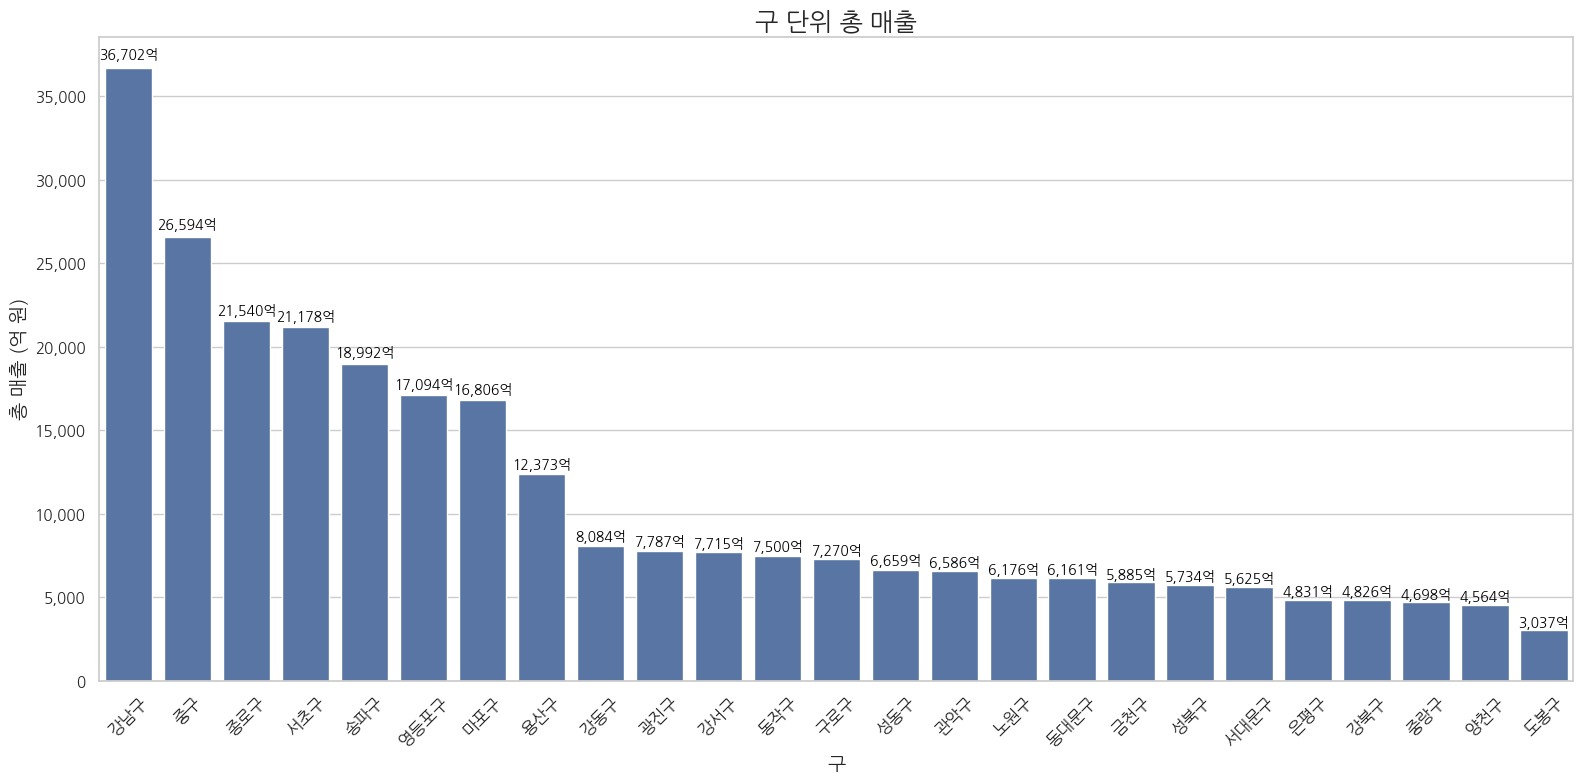

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(16,8))  # 글자 길어서 가로/세로 확대
sns.barplot(data=df_sales_gu, x='gu', y='total_sales', color='#4C72B0')

plt.title("구 단위 총 매출", fontsize=18, weight='bold')
plt.xlabel("구", fontsize=14)
plt.ylabel("총 매출 (억 원)", fontsize=14)
plt.xticks(ticks=range(len(df_sales_gu)), labels=df_sales_gu['gu'], rotation=45, fontsize=12)

# y축 스케일 억 단위로 표시
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e8:,.0f}'))

# 막대 위값 표시 (억 단위, 콤마 포함)
for index, row in enumerate(df_sales_gu.itertuples()):
    plt.text(
        index,
        row.total_sales * 1.01,
        f"{row.total_sales / 1e8:,.0f}억",
        ha='center', va='bottom',
        fontsize=10, weight='bold', color='black'
    )

plt.tight_layout()
plt.show()


///구 geojson 찾고 choropleth 시각화할 자리///

동 단위 총 매출 시각화

In [227]:
import folium
import json
import pandas as pd


df_sales_dong['dong'] = df_sales_dong['dong'].str.strip()  # 공백 제거

# GeoJSON 불러오기
with open('./src/eda/hangjeongdong_서울특별시.geojson', 'r', encoding='utf-8') as f:
    seoul_dong_geo = json.load(f)

# adm_nm에서 동 이름만 추출 → dong_name 속성 추가
for feature in seoul_dong_geo['features']:
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

# Folium Map 생성
m_dong = folium.Map(location=[37.5665, 126.9780], zoom_start=11)


folium.Choropleth(
    geo_data=seoul_dong_geo,
    data=df_sales_dong,
    columns=['dong', 'total_sales'],
    key_on='feature.properties.dong_name',  # 수정된 속성 사용
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='동 단위 총 매출(원)'
).add_to(m_dong)

m_dong

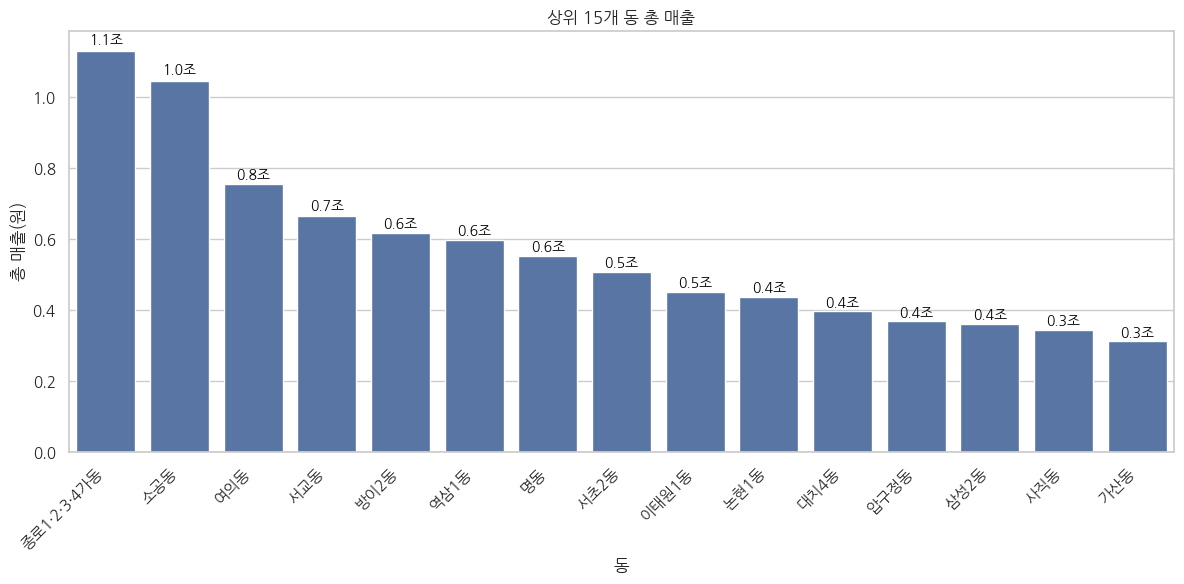

In [228]:
import folium
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# =====================
df_sales_dong['dong'] = df_sales_dong['dong'].str.strip()  # 공백 제거

# GeoJSON 불러오기
with open('./src/eda/hangjeongdong_서울특별시.geojson', 'r', encoding='utf-8') as f:
    seoul_dong_geo = json.load(f)

# GeoJSON에서 동 이름만 추출 → dong_name 속성 추가
for feature in seoul_dong_geo['features']:
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

# =====================
# 상위 N개 동만 추출
top_n = 15
df_top = df_sales_dong.sort_values('total_sales', ascending=False).head(top_n)
top_dong_list = df_top['dong'].tolist()

# Choropleth 지도 생성
m_dong = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 전체 동 배경 표시 (연한 색)
folium.Choropleth(
    geo_data=seoul_dong_geo,
    data=df_sales_dong,
    columns=['dong', 'total_sales'],
    key_on='feature.properties.dong_name',
    fill_color='Greys',
    fill_opacity=0.2,
    line_opacity=0.1,
).add_to(m_dong)

# 상위 N개 동 강조
for feature in seoul_dong_geo['features']:
    dong_name = feature['properties']['dong_name']
    if dong_name in top_dong_list:
        folium.GeoJson(
            feature,
            style_function=lambda x: {
                'fillColor': 'YlOrRd',
                'color': 'red',
                'weight': 2,
                'fillOpacity': 0.7
            },
            tooltip=folium.GeoJsonTooltip(
                fields=['dong_name'],
                aliases=['동 이름: '],
                localize=True
            )
        ).add_to(m_dong)

# 지도 저장
m_dong.save('./src/eda/sales_top_dong_map.html')

# =====================
# 상위 N개 동 막대그래프
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_top, x='dong', y='total_sales', color='#4C72B0')
plt.xticks(rotation=45, ha='right')
plt.title(f'상위 {top_n}개 동 총 매출')
plt.ylabel('총 매출(원)')
plt.xlabel('동')

# y축 스케일 1조 단위로 표시
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e12:.1f}'))

# 막대 위 값 표시 (1조 단위)
for index, row in enumerate(df_top.itertuples()):
    plt.text(
        index,
        row.total_sales * 1.01,
        f"{row.total_sales / 1e12:.1f}조",
        ha='center', va='bottom',
        fontsize=10, weight='bold', color='black'
    )

plt.tight_layout()
plt.show()


상권별 총 매출 시각화 (Top 20)

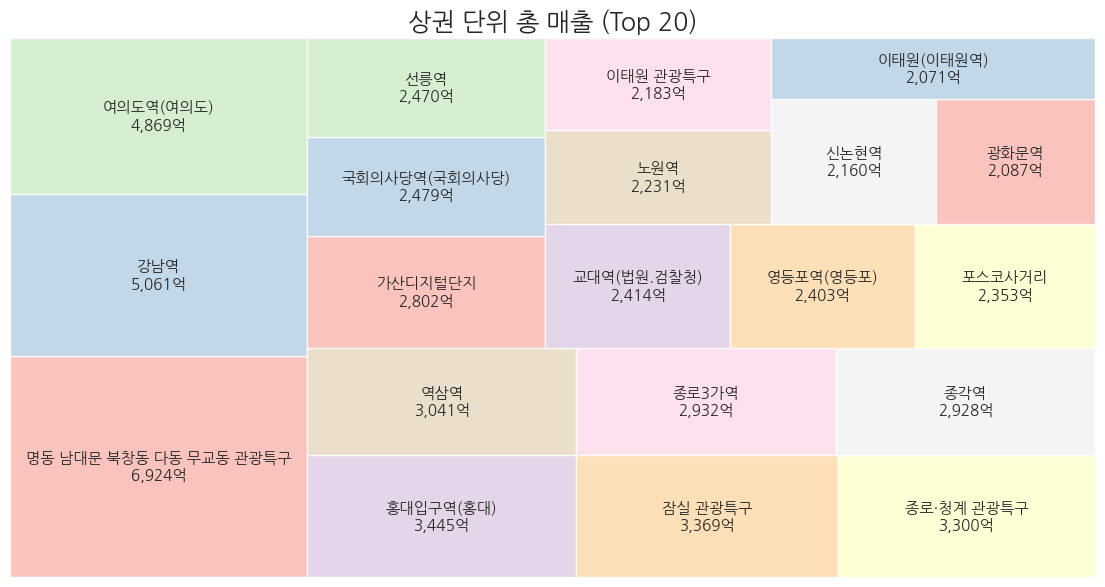

In [229]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import pandas as pd

top_20 = df_sales_area.sort_values('total_sales', ascending=False).head(20)

# 매출을 천억 단위로 변환 (int)
sales_in_100m = (top_20['total_sales'] / 1e8).astype(int)

# 라벨: 상권 이름 + 매출(천억 단위)
labels = [f"{name}\n{sales:,}억" for name, sales in zip(top_20['commercial_area'], sales_in_100m)]

# 색상: 단일 톤 계열
colors = sns.color_palette('Pastel1', len(top_20))

# 트리맵 그리기
plt.figure(figsize=(14,7))
squarify.plot(
    sizes=top_20['total_sales'],
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize':11, 'weight':'bold'}
)
plt.title("상권 단위 총 매출 (Top 20)", fontsize=18, weight='bold')
plt.axis('off')
plt.show()


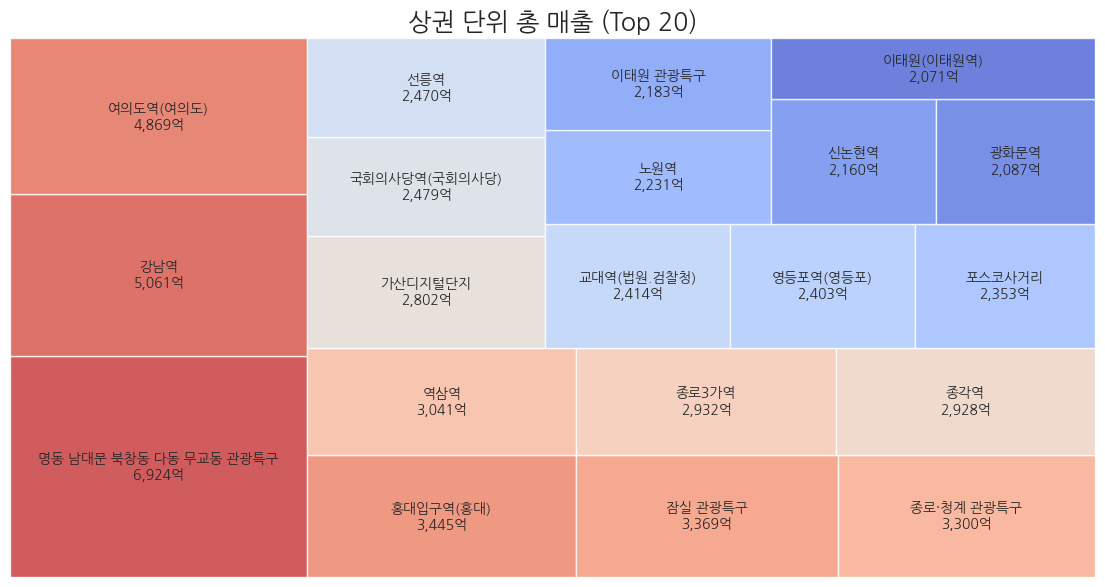

In [230]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import pandas as pd


top_20 = df_sales_area.sort_values('total_sales', ascending=False).head(20)

# 매출을 억 단위로 변환 (원 단위 기준) + 정수
sales_in_100m = (top_20['total_sales'] / 1e8).astype(int)

# 라벨: 상권 이름 + 매출 (억 단위, 쉼표 포함)
labels = [f"{name}\n{sales:,}억" for name, sales in zip(top_20['commercial_area'], sales_in_100m)]

# 색상 팔레트: YlOrBr, 큰 매출 진하게
palette = sns.color_palette("coolwarm", len(top_20))[::-1]

# 트리맵 그리기
plt.figure(figsize=(14,7))
squarify.plot(
    sizes=top_20['total_sales'],
    label=labels,
    color=palette,
    alpha=0.8,
    text_kwargs={'fontsize':10, 'weight':'bold'}
)
plt.title("상권 단위 총 매출 (Top 20)", fontsize=18, weight='bold')
plt.axis('off')
plt.show()


#### 점포 대비 매출 효율성

csv 파일 저장

In [ ]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

# SQLAlchemy 엔진 생성
db_url = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(db_url)

# 구 단위 점포 대비 매출 효율성 쿼리
query_sales_per_shop_by_gu = """
SELECT ca.gu,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sc.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu
ORDER BY avg_sales_per_shop DESC;
"""

# pandas로 읽기
df_sales_per_shop_by_gu = pd.read_sql(query_sales_per_shop_by_gu, engine)

# CSV 저장
df_sales_per_shop_by_gu.to_csv('./src/eda/sales_per_shop_by_gu.csv', index=False, encoding='utf-8-sig')

# 동
query_sales_per_shop_by_dong = """SELECT ca.dong,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sc.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.dong
ORDER BY avg_sales_per_shop DESC;
"""
df_sales_per_shop_by_dong = pd.read_sql(query_sales_per_shop_by_dong, engine)
df_sales_per_shop_by_dong.to_csv('./src/eda/sales_per_shop_by_dong.csv', index=False, encoding='utf-8-sig')


# 상권
query_sales_per_shop_by_area = """SELECT ca.name AS commercial_area,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sc.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.code, ca.name
ORDER BY avg_sales_per_shop DESC;
"""
df_sales_per_shop_by_area = pd.read_sql(query_sales_per_shop_by_area, engine)
df_sales_per_shop_by_area.to_csv('./src/eda/sales_per_shop_by_area.csv', index=False, encoding='utf-8-sig')


conn.close()

In [232]:
import pandas as pd

df_sales_per_shop_by_gu = pd.read_csv('./src/eda/sales_per_shop_by_gu.csv')
df_sales_per_shop_by_dong = pd.read_csv('./src/eda/sales_per_shop_by_dong.csv')
df_sales_per_shop_by_area = pd.read_csv('./src/eda/sales_per_shop_by_area.csv')

상권 단위 점포 효율성 시각화 (총매출/점포수)

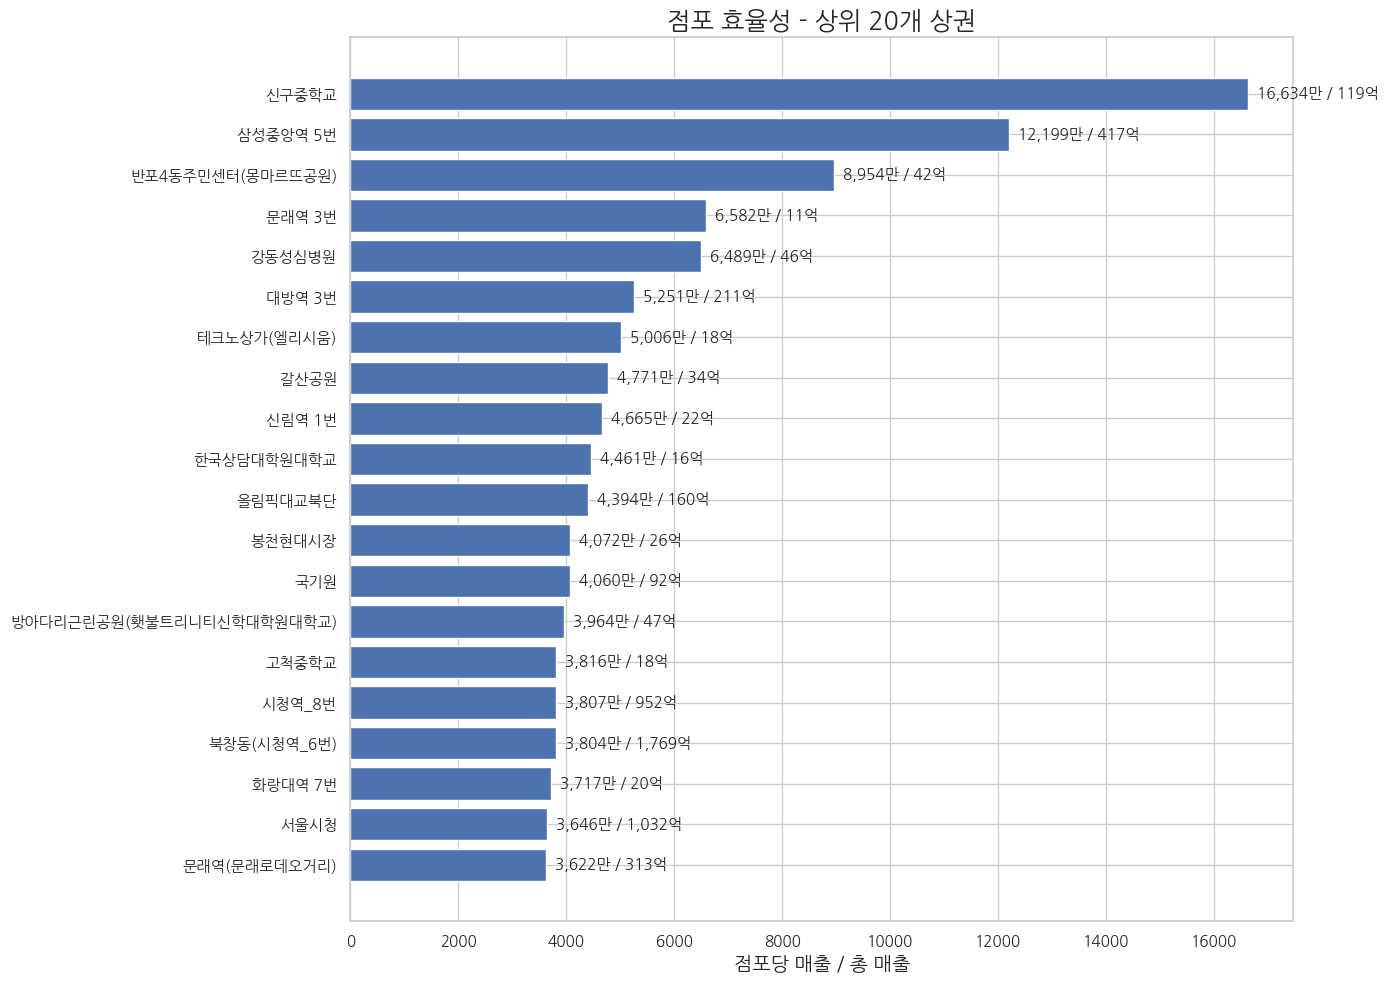

In [244]:
import matplotlib.pyplot as plt

# Top 20 점포당 매출 기준 정렬
top_20_efficiency = df_sales_per_shop_by_area.sort_values('avg_sales_per_shop', ascending=False).head(20)

# 단위 변환
top_20_efficiency['avg_sales_per_shop_1w'] = (top_20_efficiency['avg_sales_per_shop'] / 1e4).astype(int)  # 점포당 매출: 만 단위
top_20_efficiency['total_sales_1e8'] = (top_20_efficiency['total_sales'] / 1e8).astype(int)              # 총매출: 억 단위

# 그래프 그리기 (크기 확대)
plt.figure(figsize=(14,10))
bars = plt.barh(
    y=top_20_efficiency['commercial_area'],
    width=top_20_efficiency['avg_sales_per_shop_1w'],
    color='#4C72B0'
)

# 위에서부터 큰 순서
plt.gca().invert_yaxis()

# x축 레이블
plt.xlabel('점포당 매출 / 총 매출', fontsize=14)
plt.title('점포 효율성 - 상위 20개 상권', fontsize=18, weight='bold')

# 막대에 숫자 표시: 점포당 매출 / 총매출
for bar, avg, total in zip(bars, top_20_efficiency['avg_sales_per_shop_1w'], top_20_efficiency['total_sales_1e8']):
    plt.text(
        bar.get_width() + max(top_20_efficiency['avg_sales_per_shop_1w'])*0.01,  # 막대 오른쪽 약간 띄움
        bar.get_y() + bar.get_height()/2,
        f"{avg:,}만 / {total:,}억",
        va='center',
        fontsize=11,
        weight='bold'
    )

plt.tight_layout()
plt.show()


시간대별/요일별/성별/연령대별 매출 집중 지역 파악 및 특성 분석

In [246]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

# SQLAlchemy 엔진 생성
db_url = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(db_url)

# 시간대별 매출
query_sales_time_by_area = """
SELECT ca.name AS commercial_area,
       st.time,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sc.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.name, st.time
ORDER BY ca.name, st.time;
"""

# pandas로 읽기
df_sales_time_by_area = pd.read_sql(query_sales_time_by_area, engine)

# CSV 저장
df_sales_time_by_area.to_csv('./src/eda/sales_time_by_area.csv', index=False, encoding='utf-8-sig')


# 요일별 매출
query_sales_day_by_area = """SELECT ca.name AS commercial_area,
       sd.week,
       SUM(sd.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Day sd ON sd.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.name, sd.week
ORDER BY ca.name, FIELD(sd.week,'MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY');
"""
df_sales_day_by_area = pd.read_sql(query_sales_day_by_area, engine)
df_sales_day_by_area.to_csv('./src/eda/sales_day_by_area.csv', index=False, encoding='utf-8-sig')


# 성별 매출
query_sales_sex_by_area = """SELECT ca.name AS commercial_area,
       ss.sex,
       SUM(ss.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Sex ss ON ss.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.name, ss.sex
ORDER BY ca.name, ss.sex;
"""
df_sales_sex_by_area = pd.read_sql(query_sales_sex_by_area, engine)
df_sales_sex_by_area.to_csv('./src/eda/sales_sex_by_area.csv', index=False, encoding='utf-8-sig')

# 연령대 매출 
query_sales_age_by_area = """SELECT ca.name AS commercial_area,
       sa.age,
       SUM(sa.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Age sa ON sa.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
JOIN Service_Category sca ON sca.code = sc.service_category_code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.name, sa.age
ORDER BY ca.name, sa.age;
"""
df_sales_age_by_area = pd.read_sql(query_sales_age_by_area, engine)
df_sales_age_by_area.to_csv('./src/eda/sales_age_by_area.csv', index=False, encoding='utf-8-sig')


In [247]:
import pandas as pd

df_sales_time = pd.read_csv('./src/eda/sales_time_by_area.csv')
df_sales_day = pd.read_csv('./src/eda/sales_day_by_area.csv')
df_sales_sex = pd.read_csv('./src/eda/sales_sex_by_area.csv')
df_sales_age = pd.read_csv('./src/eda/sales_age_by_area.csv')

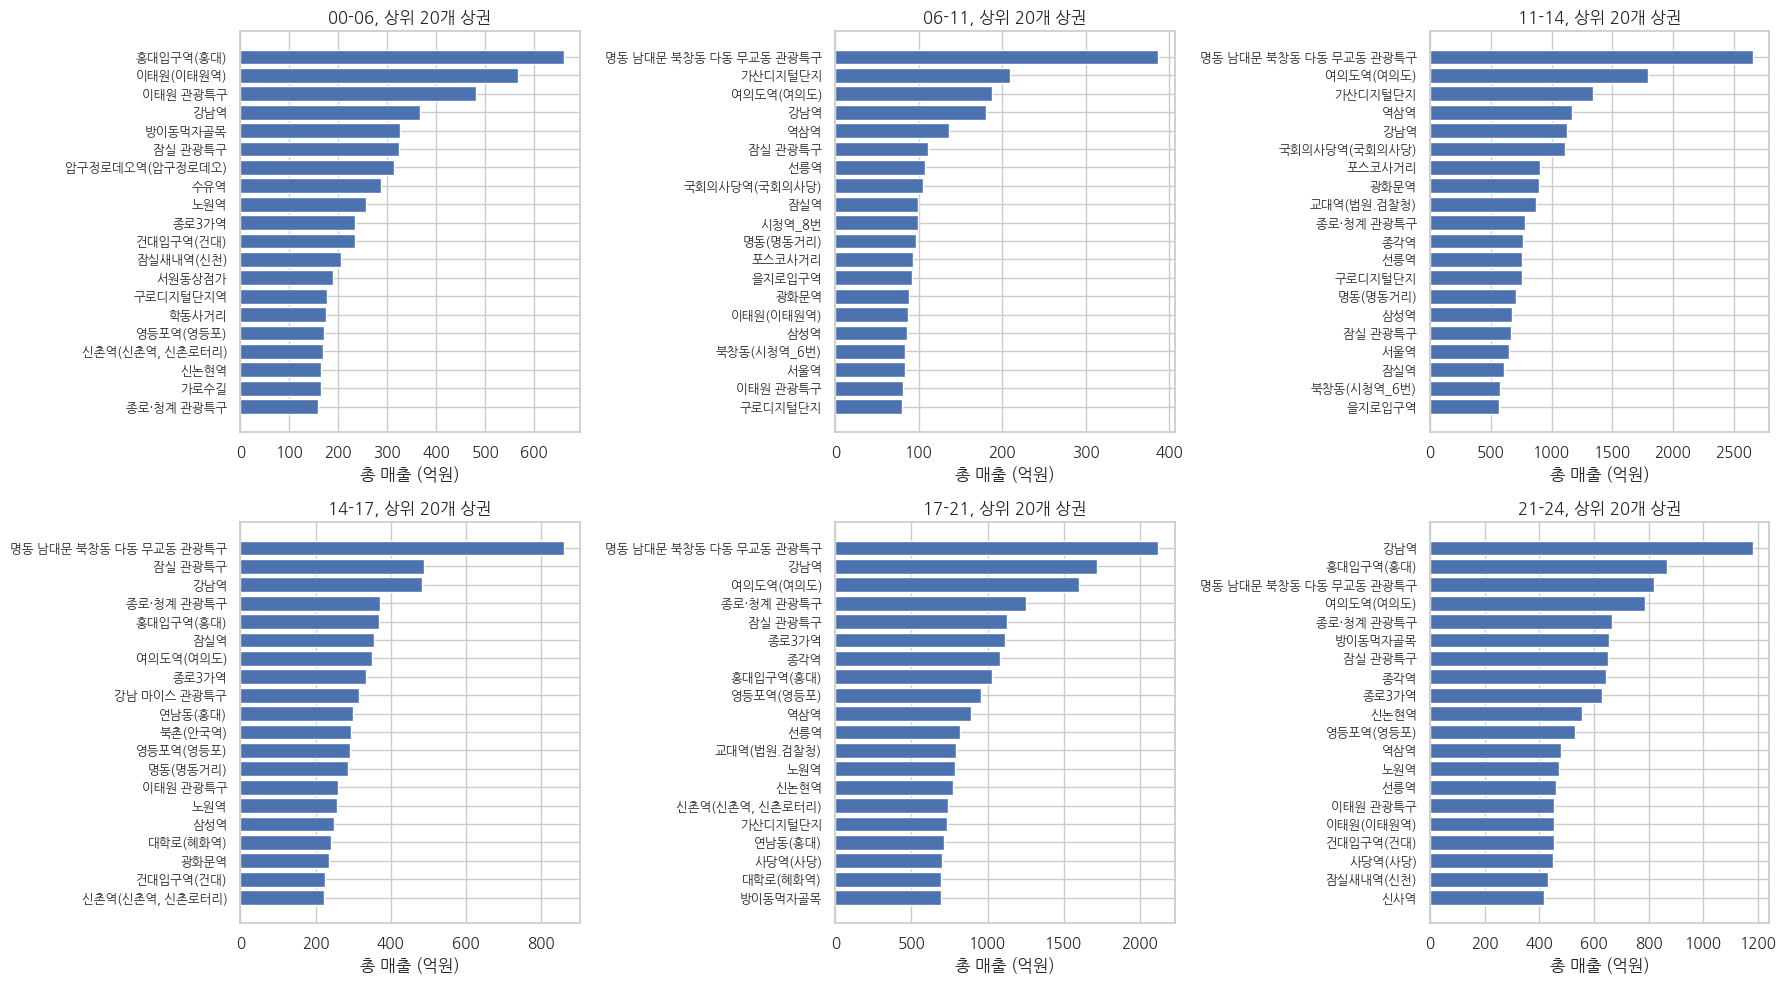

In [263]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'NanumGothic'

# 각 시간대별 상위 20개 상권 추출
time_slots = ['00-06','06-11','11-14','14-17','17-21','21-24']

# Figure 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2차원 배열을 1차원으로 변환해 반복문에서 쉽게 접근

for i, time_slot in enumerate(time_slots):
    # 해당 시간대 데이터
    subset = df_sales_time[df_sales_time['time'] == time_slot]
    top_20 = subset.sort_values('total_sales', ascending=False).head(20)

    # 그래프
    axes[i].barh(top_20['commercial_area'], top_20['total_sales'] / 1e8, color='#4C72B0')
    axes[i].invert_yaxis()
    axes[i].set_title(f'{time_slot}, 상위 20개 상권', fontsize=12, weight='bold')
    axes[i].set_xlabel('총 매출 (억원)')
    axes[i].tick_params(axis='y', labelsize=9)

# 간격 조정
plt.tight_layout()
plt.show()


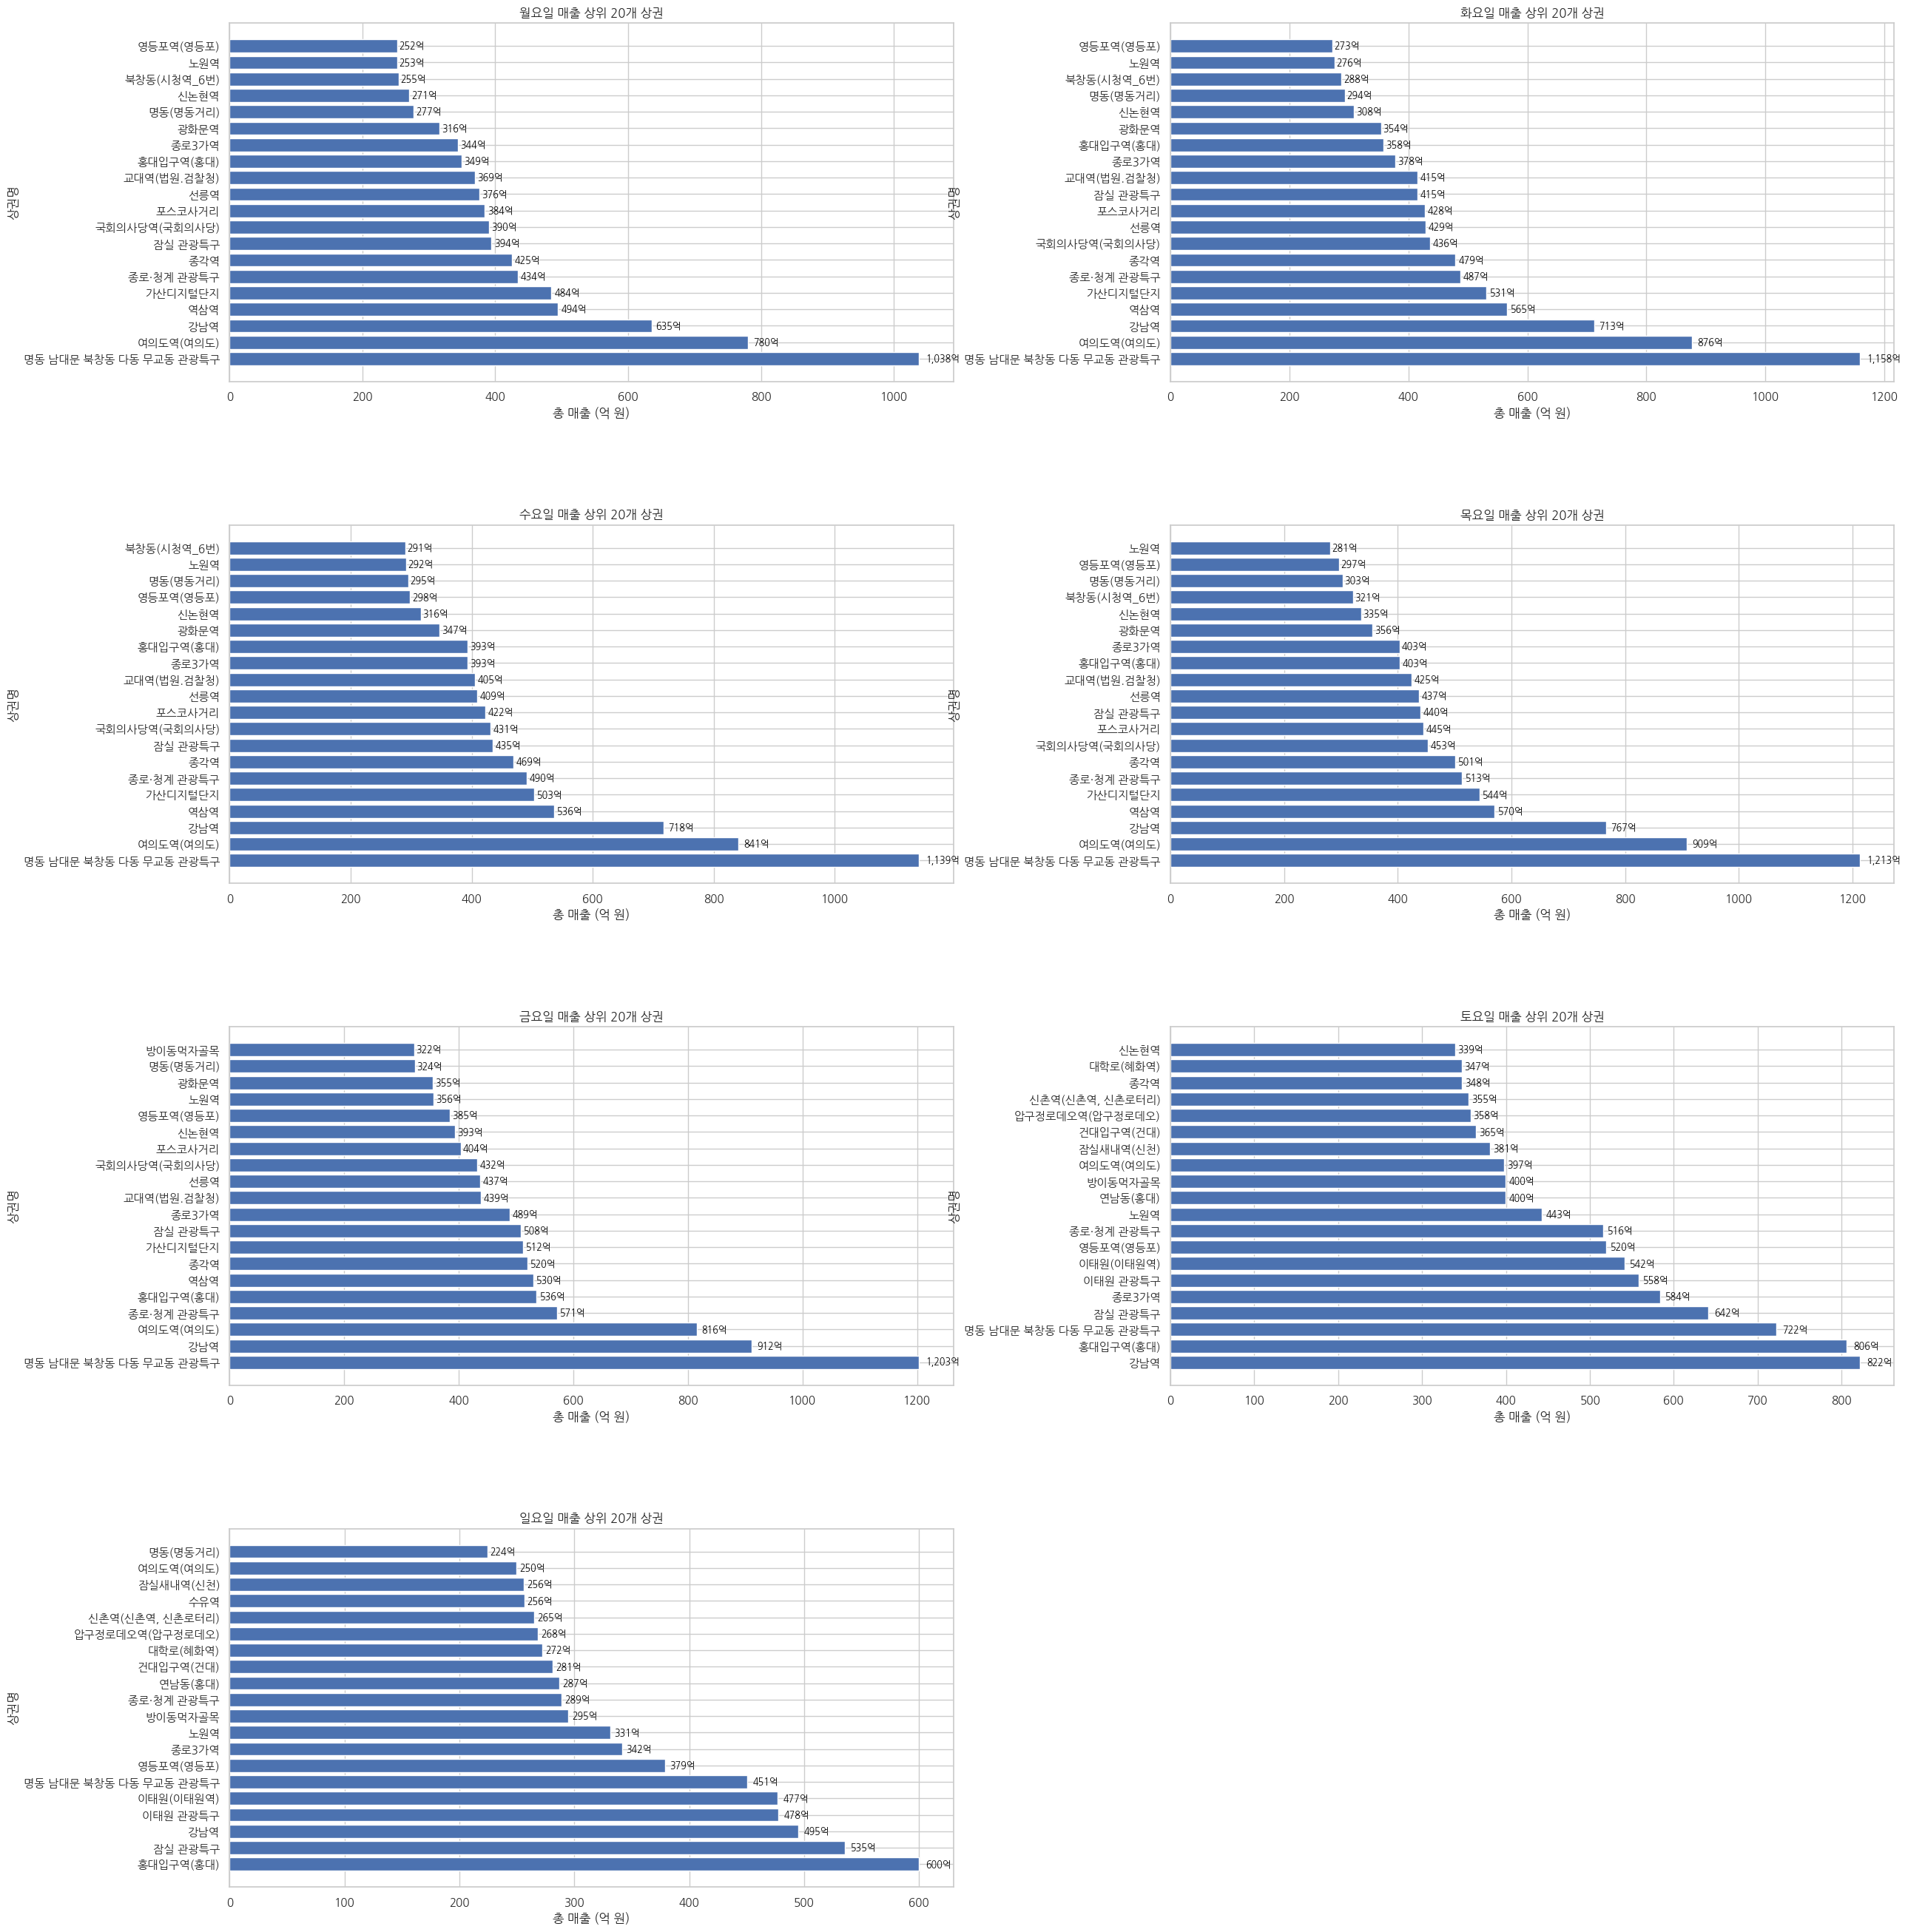

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 불러오기
df_sales_day = pd.read_csv('./src/eda/sales_day_by_area.csv', encoding='utf-8-sig')

# 2. 요일 순서 및 한글 라벨
weekday_order = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
weekday_labels = {
    'MONDAY':'월요일', 'TUESDAY':'화요일', 'WEDNESDAY':'수요일', 
    'THURSDAY':'목요일','FRIDAY':'금요일','SATURDAY':'토요일','SUNDAY':'일요일'
}
df_sales_day['week'] = pd.Categorical(df_sales_day['week'], categories=weekday_order, ordered=True)

# 3. Top20 상권 추출
top20_by_week = (
    df_sales_day.sort_values(['week','total_sales'], ascending=[True, False])
    .groupby('week', observed=True)
    .head(20)
    .reset_index(drop=True)
)

# 4. 단위 변환: 총매출 억 단위
top20_by_week['total_sales_억'] = top20_by_week['total_sales'] / 1e8

# 5. Figure: 4행 × 2열
fig, axes = plt.subplots(4, 2, figsize=(25, 28))
axes = axes.flatten()

for i, week in enumerate(weekday_order):
    group = top20_by_week[top20_by_week['week'] == week].copy()
    if group.empty:
        axes[i].axis('off')
        continue

    group_sorted = group.sort_values('total_sales_억', ascending=True)

    # 막대 그래프
    axes[i].barh(
        y=group_sorted['commercial_area'],
        width=group_sorted['total_sales_억'],
        color='#4C72B0'
    )
    axes[i].invert_yaxis()
    axes[i].set_title(f"{weekday_labels[week]} 매출 상위 20개 상권", fontsize=12, weight='bold')
    axes[i].set_xlabel("총 매출 (억 원)")
    axes[i].set_ylabel("상권명")

    # 막대 위 숫자 표시
    for bar, value in zip(axes[i].patches, group_sorted['total_sales_억']):
        axes[i].text(
            bar.get_width() + bar.get_width()*0.01,
            bar.get_y() + bar.get_height()/2,
            f"{value:,.0f}억",
            va='center', fontsize=9, weight='bold', color='black'
        )

# 6. 빈 subplot 처리 (총 8칸 중 7개 사용)
axes[-1].axis('off')

# 7. 여백 수동 조정
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

plt.show()


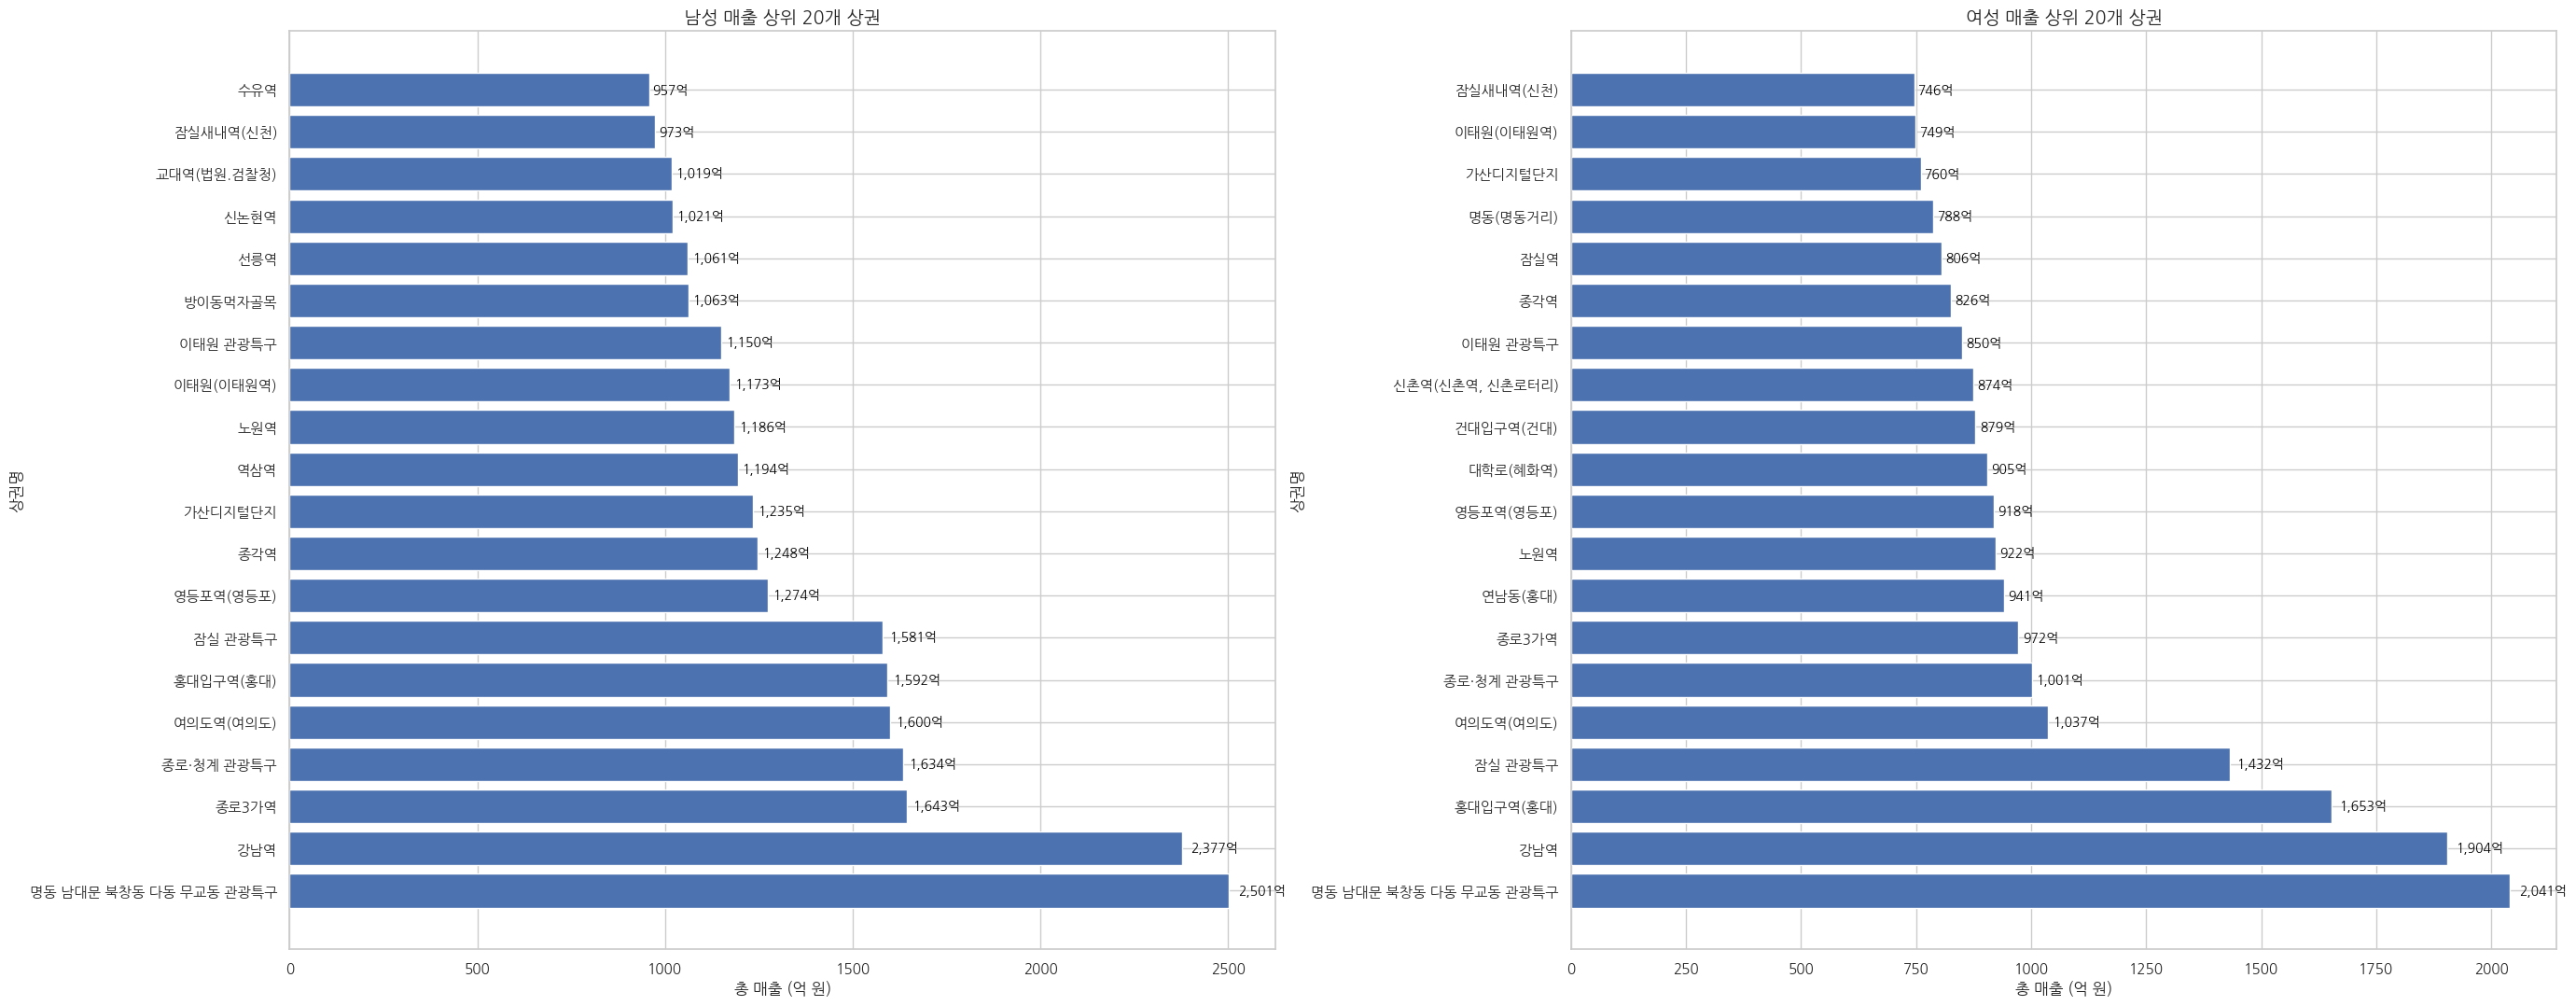

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df_sales_sex = pd.read_csv('./src/eda/sales_sex_by_area.csv', encoding='utf-8-sig')

# 단위 변환: 총매출 억 단위
df_sales_sex['total_sales_억'] = df_sales_sex['total_sales'] / 1e8

# 성별 목록
sex_list = ['MALE', 'FEMALE']
sex_labels = {'MALE':'남성', 'FEMALE':'여성'}

# Figure: 2행 × 1열씩 4개 subplot은 필요 없고, 성별은 2개니까 1행 × 2열
fig, axes = plt.subplots(1, 2, figsize=(27, 12))
axes = axes.flatten()

for i, sex in enumerate(sex_list):
    group = df_sales_sex[df_sales_sex['sex'] == sex].copy()
    group_sorted = group.sort_values('total_sales_억', ascending=False).head(20)
    group_sorted = group_sorted.sort_values('total_sales_억', ascending=True)  # 가로막대에서 큰게 위

    # 가로 막대그래프
    axes[i].barh(
        y=group_sorted['commercial_area'],
        width=group_sorted['total_sales_억'],
        color='#4C72B0'
    )
    axes[i].invert_yaxis()
    axes[i].set_title(f"{sex_labels[sex]} 매출 상위 20개 상권", fontsize=14, weight='bold')
    axes[i].set_xlabel("총 매출 (억 원)")
    axes[i].set_ylabel("상권명")

    # 막대 위 숫자 표시
    for bar, value in zip(axes[i].patches, group_sorted['total_sales_억']):
        axes[i].text(
            bar.get_width() + bar.get_width()*0.01,
            bar.get_y() + bar.get_height()/2,
            f"{value:,.0f}억",
            va='center', fontsize=10, weight='bold', color='black'
        )

plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.08, wspace=0.3)
plt.show()


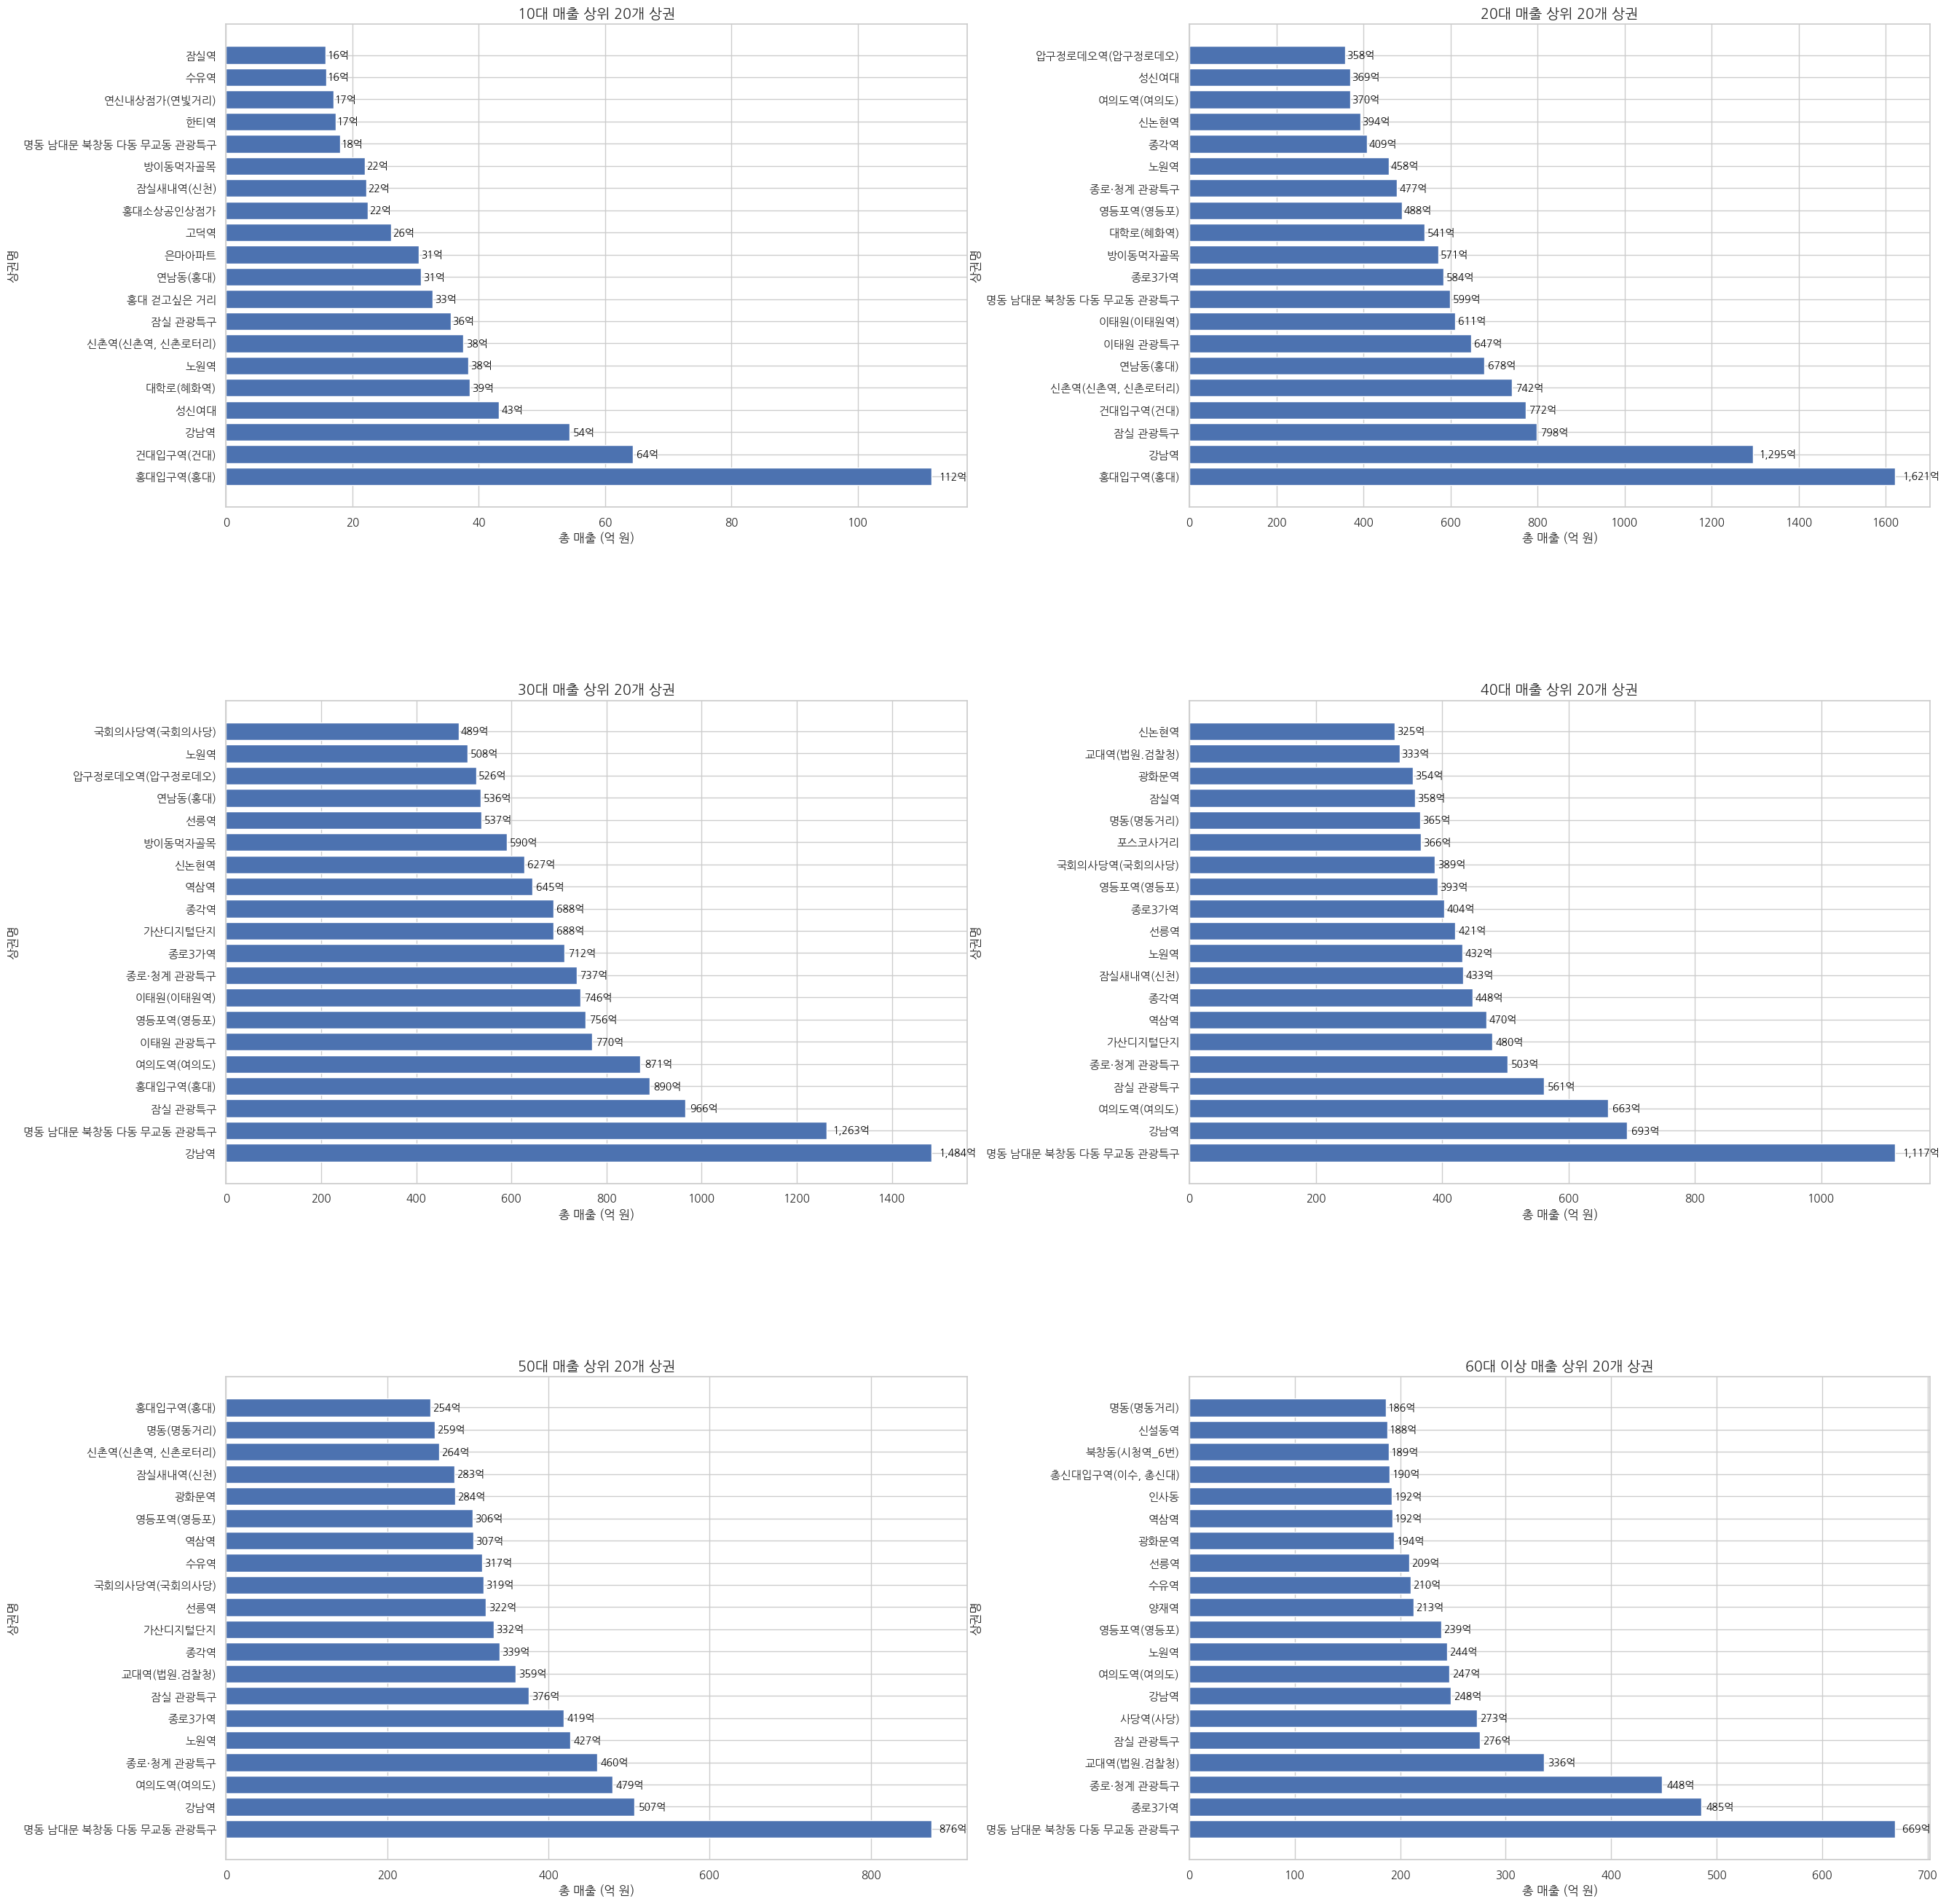

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df_sales_age = pd.read_csv('./src/eda/sales_age_by_area.csv', encoding='utf-8-sig')

# 단위 변환: 총매출 억 단위
df_sales_age['total_sales_억'] = df_sales_age['total_sales'] / 1e8

# 연령대 순서와 한글 라벨
age_list = ['TEENS','TWENTIES','THIRTIES','FORTIES','FIFTIES','SIXTIES_PLUS']
age_labels = {
    'TEENS':'10대','TWENTIES':'20대','THIRTIES':'30대',
    'FORTIES':'40대','FIFTIES':'50대','SIXTIES_PLUS':'60대 이상'
}

# Figure: 3행 × 2열
fig, axes = plt.subplots(3, 2, figsize=(26, 28))
axes = axes.flatten()

for i, age in enumerate(age_list):
    group = df_sales_age[df_sales_age['age'] == age].copy()
    
    if group.empty:
        axes[i].axis('off')  # 데이터 없으면 subplot 숨김
        continue

    group_sorted = group.sort_values('total_sales_억', ascending=False).head(20)
    group_sorted = group_sorted.sort_values('total_sales_억', ascending=True)  # 가로 막대에서 큰게 위

    # 가로 막대그래프
    axes[i].barh(
        y=group_sorted['commercial_area'],
        width=group_sorted['total_sales_억'],
        color='#4C72B0'
    )
    axes[i].invert_yaxis()
    
    # 제목, x축, y축 레이블 명시적으로 설정
    axes[i].set_title(f"{age_labels[age]} 매출 상위 20개 상권", fontsize=14, weight='bold')
    axes[i].set_xlabel("총 매출 (억 원)")
    axes[i].set_ylabel("상권명")

    # 막대 위 숫자 표시
    for bar, value in zip(axes[i].patches, group_sorted['total_sales_억']):
        axes[i].text(
            bar.get_width() + bar.get_width()*0.01,
            bar.get_y() + bar.get_height()/2,
            f"{value:,.0f}억",
            va='center', fontsize=10, weight='bold', color='black'
        )

# 마지막 subplot이 비어있을 경우 axis off 처리
for j in range(len(age_list), len(axes)):
    axes[j].axis('off')

# 여백 조정
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)
plt.show()


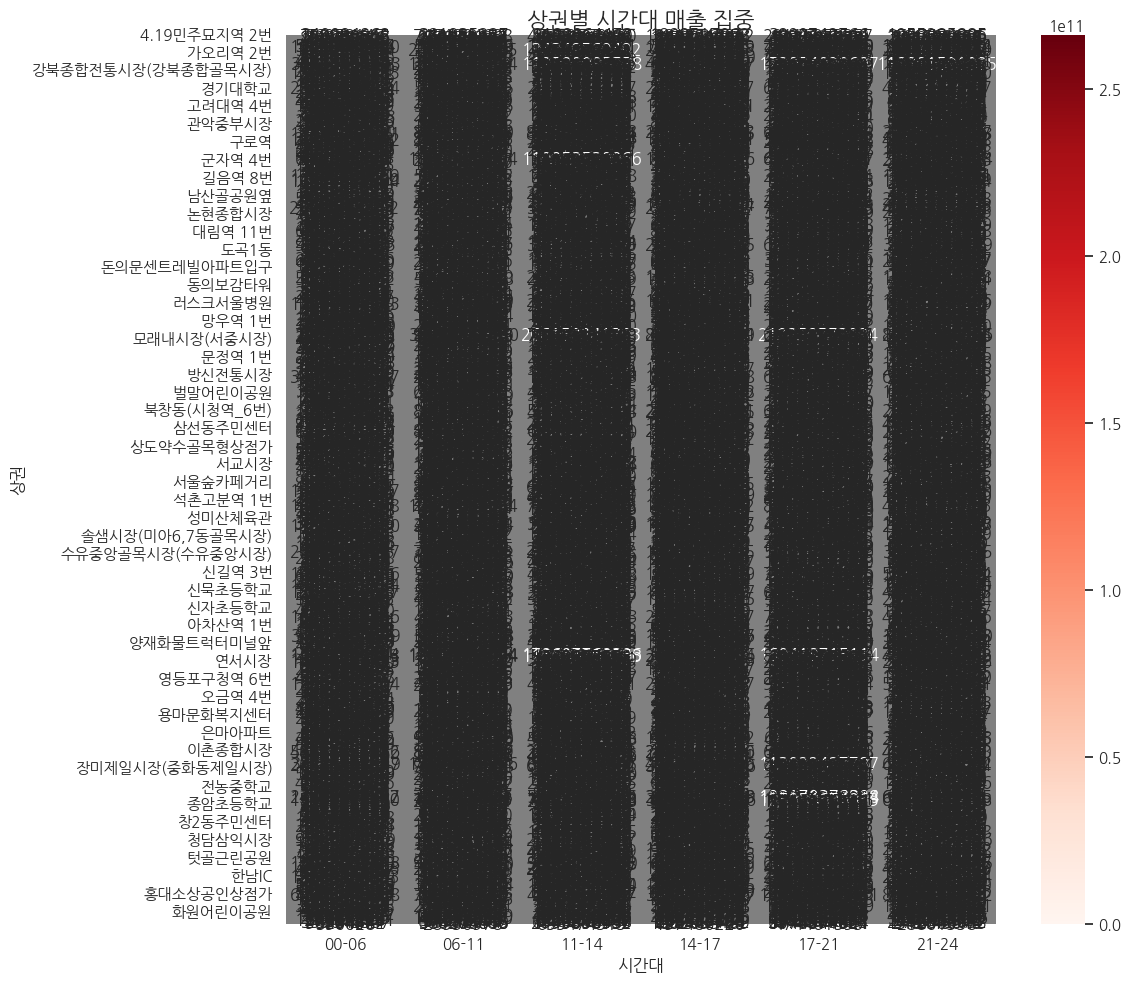

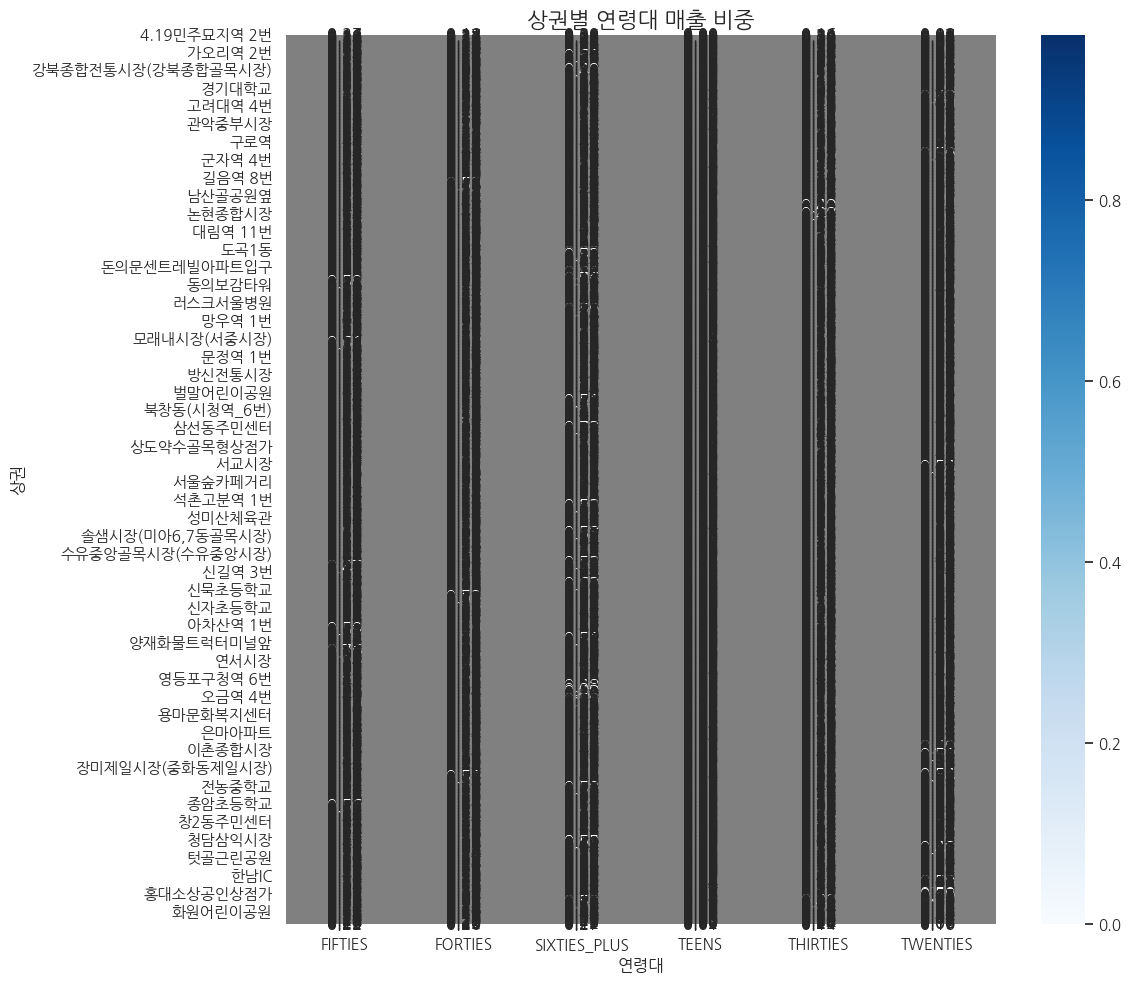

=== 상권별 핵심 패턴 ===
4.19민주묘지역 2번 상권은 17-21 시간대에 SIXTIES_PLUS 연령층 매출이 가장 높음 → 타겟 마케팅 유리
63빌딩 상권은 11-14 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
DMC(디지털미디어시티) 상권은 11-14 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
GS강동자이아파트 상권은 17-21 시간대에 FIFTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
G타워 상권은 11-14 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KB국민은행 망원동지점 상권은 17-21 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KB국민은행 서강지점 상권은 11-14 시간대에 FORTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KB국민은행 종암동지점 상권은 11-14 시간대에 SIXTIES_PLUS 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KB국민은행 중화동지점 상권은 11-14 시간대에 SIXTIES_PLUS 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KC대학교 상권은 17-21 시간대에 SIXTIES_PLUS 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KT&G 북부지사 상권은 17-21 시간대에 FIFTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KT구로지사 상권은 17-21 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KT금천빌딩(금천구시설관리공단) 상권은 11-14 시간대에 THIRTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KT대방빌딩 상권은 11-14 시간대에 FORTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
KT월곡지사 상권은 17-21 시간대에 FIFTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
NH농협은행 보광동지점 상권은 11-14 시간대에 FIFTIES 연령층 매출이 가장 높음 → 타겟 마케팅 유리
NH농협은행 

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ 상권별 시간대 매출 집중 확인
# -------------------------------
# pivot: 상권 × 시간대
pivot_time = df_sales_time.pivot(index='commercial_area', columns='time', values='total_sales')

# Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_time, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt='.0f')
plt.title('상권별 시간대 매출 집중', fontsize=16, weight='bold')
plt.xlabel('시간대')
plt.ylabel('상권')
plt.tight_layout()
plt.show()

# -------------------------------
# 2️⃣ 상권별 연령대 매출 집중 확인
# -------------------------------
# pivot: 상권 × 연령대
pivot_age = df_sales_age.pivot(index='commercial_area', columns='age', values='total_sales')

# 연령대별 비율 계산
age_ratio = pivot_age.div(pivot_age.sum(axis=1), axis=0)

# Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(age_ratio, cmap='Blues', linewidths=0.5, linecolor='gray', annot=True, fmt='.2f')
plt.title('상권별 연령대 매출 비중', fontsize=16, weight='bold')
plt.xlabel('연령대')
plt.ylabel('상권')
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ 핵심 메시지 자동 생성
# -------------------------------
# 상권별 최고 매출 시간대
max_time = pivot_time.idxmax(axis=1)
# 상권별 매출 비중이 가장 큰 연령대
dominant_age = age_ratio.idxmax(axis=1)

print("=== 상권별 핵심 패턴 ===")
for area, time, age in zip(max_time.index, max_time.values, dominant_age.values):
    print(f"{area} 상권은 {time} 시간대에 {age} 연령층 매출이 가장 높음 → 타겟 마케팅 유리")
